# Import

In [1]:
# Importing core data processing and visualization libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import time

# Scikit-learn model selection and evaluation tools
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.model_selection import KFold  # Cross-validation strategy

# Model performance metrics
from sklearn.metrics import mean_squared_error  

# Scikit-learn regression models
from sklearn.linear_model import LinearRegression  # Basic linear model
from sklearn.linear_model import Ridge  # L2 regularization
from sklearn.linear_model import Lasso  # L1 regularization
from sklearn.linear_model import ElasticNet  # Combined L1/L2 regularization
from sklearn.tree import DecisionTreeRegressor  # Single tree model
from sklearn.ensemble import RandomForestRegressor  # Ensemble of decision trees
from sklearn.ensemble import ExtraTreesRegressor  # Extremely Randomized Trees
from sklearn.ensemble import GradientBoostingRegressor  # Gradient boosting implementation
from sklearn.neighbors import KNeighborsRegressor  # K-nearest neighbors regressor

# XGBoost - optimized gradient boosting library
from xgboost import XGBRegressor

# Model persistence
import joblib  # For saving/loading trained models
import gradio as gr

import warnings
warnings.filterwarnings('ignore')  # Use with caution - only for production-ready code

# Load Data

In [2]:
# Loading the dataset from CSV file into a pandas DataFrame
df = pd.read_csv('tehranhouses.csv')
# Displaying first 5 rows of the dataframe to:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


# Explore The Data

In [2]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
# lowest price
df[df['Price'] == 3.600000e+06]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
136,160,1,False,False,False,Qarchak,3600000,120.0


In [6]:
# Highest price
df[df['Price'] == 9.240000e+10]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1707,420,4,True,True,True,Zaferanieh,92400000000,3080000.0


In [7]:
df['Area'] = df['Area'].str.replace(',','')

In [8]:
df['Area'] = pd.to_numeric(df['Area'] ,errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 146.2+ KB


In [10]:
df.shape

(3479, 8)

In [11]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [12]:
# Remove rows with any missing values (in-place modification)
df.dropna(inplace=True)

In [13]:
df.shape

(3456, 8)

In [14]:
df['Parking'].value_counts(normalize=True)*100

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [15]:
df['Warehouse'].value_counts(normalize=True)*100

Warehouse
True     91.493056
False     8.506944
Name: proportion, dtype: float64

In [16]:
df['Elevator'].value_counts(normalize=True)*100

Elevator
True     78.732639
False    21.267361
Name: proportion, dtype: float64

In [17]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [18]:
df.describe()

,Area,Room,Price,Price(USD)
count,3.456000e+03,3456.000000,3.456000e+03,3.456000e+03
mean,8.802191e+06,2.081308,5.379957e+09,1.793319e+05
std,3.177783e+08,0.759723,8.121729e+09,2.707243e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.420000e+09,4.733333e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.210000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


In [19]:
df[df['Area'] <= 85]['Parking'].value_counts()

Parking
True     1104
False     418
Name: count, dtype: int64

In [20]:
df['Address'].unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [21]:
len(df['Address'].unique())

192

In [22]:
df.groupby('Room')['Price'].mean()

Room
0    7.860500e+09
1    1.707481e+09
2    3.330303e+09
3    1.093869e+10
4    2.560033e+10
5    3.373439e+10
Name: Price, dtype: float64

In [23]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [24]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [25]:
df2 = df.copy()

In [26]:
df2.loc[:, "Price"] =df["Price"].apply('{:,.0f}'.format)

C:\Users\SanCo\AppData\Local\Temp\ipykernel_2744\1079997294.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1,850,000,000' '1,850,000,000' '550,000,000' ... '365,000,000'
 '5,600,000,000' '360,000,000']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[:, "Price"] =df["Price"].apply('{:,.0f}'.format)


In [27]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000",116667
3475,83,2,True,True,True,Niavaran,"6,800,000,000",226667
3476,75,2,False,False,False,Parand,"365,000,000",12167
3477,105,2,True,True,True,Dorous,"5,600,000,000",186667


# Visualization

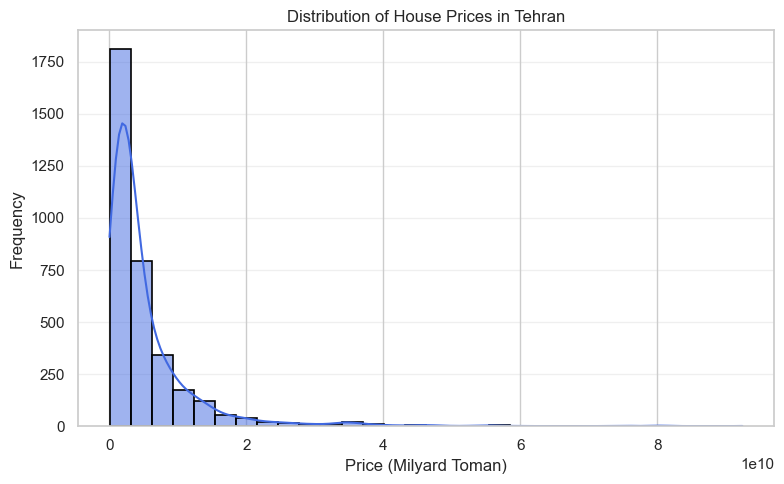

In [113]:
# price distribution with KDE (Kernel Density Estimation)
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True,
             color='royalblue', edgecolor='black', linewidth=1.2)  
plt.title('Distribution of House Prices in Tehran')
plt.xlabel('Price (Milyard Toman)') 
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()  
plt.show()

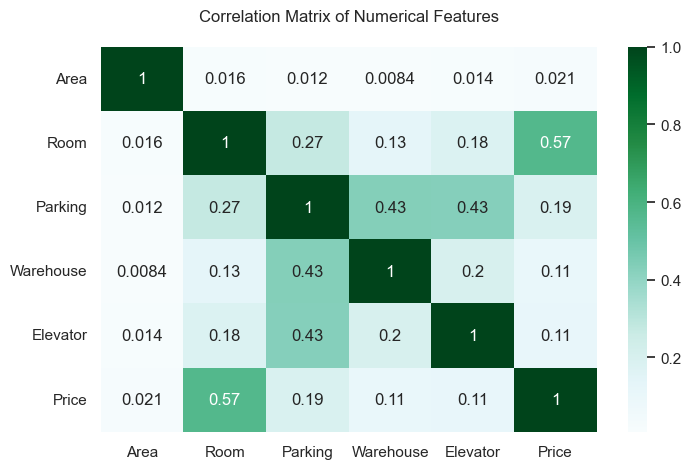

In [119]:
# Generate correlation heatmap for numerical features
plt.figure(figsize=(8, 5)) 

# Create heatmap with enhanced parameters
heatmap = sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True, cmap="BuGn")

plt.title('Correlation Matrix of Numerical Features\n')
plt.show()

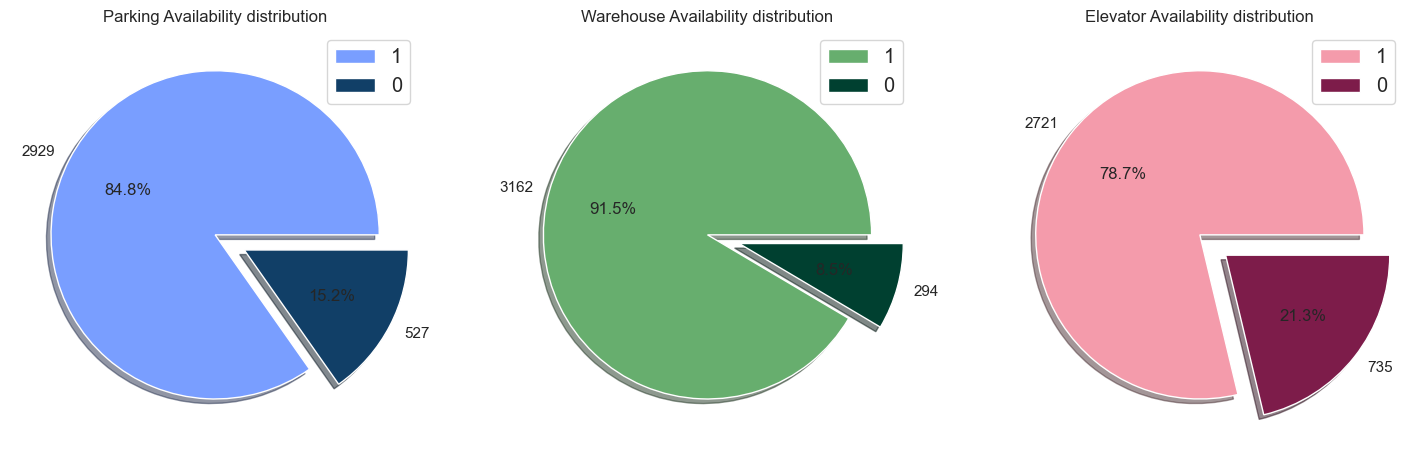

In [121]:
# Pie charts showing percentage and count of properties with parking, warehouse, and elevator
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#799EFF', '#113F67'],
          ['#67AE6E', '#004030'],
          ['#F49BAB', '#7D1C4A']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True, autopct='%1.1f%%')
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} Availability distribution'.format(columns[i]))

In [33]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

In [34]:
df['Address'].value_counts().head()

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Name: count, dtype: int64

In [35]:
df.sort_values('Price' , ascending=False)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1707,420,4,True,True,True,Zaferanieh,92400000000,3080000
1810,705,5,True,True,False,Abazar,91000000000,3033333
430,400,5,True,True,False,Lavasan,85000000000,2833333
819,680,5,True,True,False,Ekhtiarieh,81600000000,2720000
1332,350,4,True,True,True,Niavaran,80500000000,2683333
...,...,...,...,...,...,...,...,...
2201,49,1,True,True,False,Andisheh,110000000,3667
2721,110,0,True,True,True,Parand,102000000,3400
731,75,2,True,True,True,Pardis,60000000,2000
2770,83,2,True,True,True,Ozgol,55000000,1833


In [36]:
df.sort_values('Price' , ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Preprocessing

In [37]:
df = df.drop('Price(USD)' ,axis=1)

In [39]:
# Convert boolean features (True/False) to integers (1/0) for analysis
boolean_features = ['Parking' , 'Warehouse' , 'Elevator']
df[boolean_features] = df[boolean_features].astype('int64')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [124]:
# Calculate and display skewness for all numeric features
numeric_skew = df.select_dtypes(include=['int', 'float']).skew()
print("Feature Skewness Analysis:\n")
print(numeric_skew)

Feature Skewness Analysis:

Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


<Axes: xlabel='Price'>

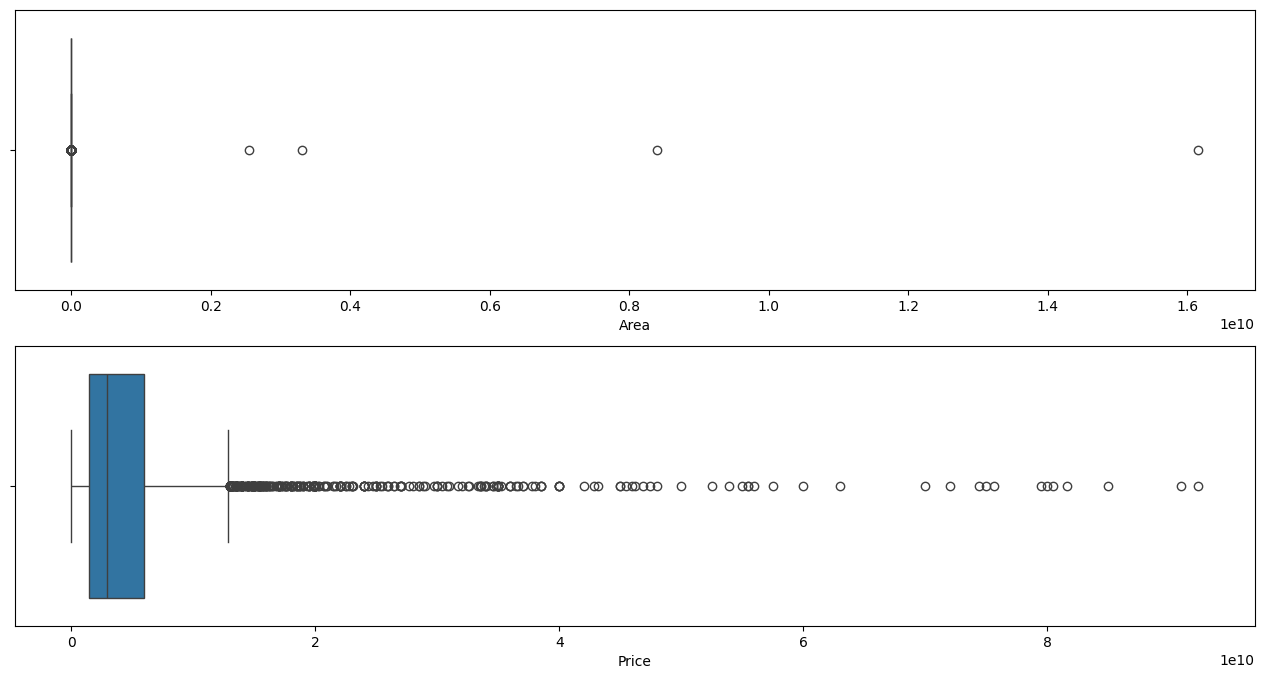

In [41]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1) #  , شماره_پلات , تعداد_ستونها, تعداد_سطرها
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# # پلات بالایی
# sns.boxplot(x=df['Area'], ax=ax[0])

# # پلات پایینی
# sns.boxplot(x=df['Price'], ax=ax[1])

In [42]:
# Function for calculate lower/upper bounds for outlier detection using 1.5*IQR rule
def find_lower_Upper(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    # Q1 = np.percentile(x, 25)
    # Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return lower , upper

In [43]:
# Calculate bounds
ower_area, upper_area = find_lower_Upper(df['Area'])
lower_price , upper_price = find_lower_Upper(df['Price'])

In [44]:
print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [45]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)

# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [46]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [47]:
pd.get_dummies(df['Address'])

,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Convert address strings into one-hot encoded dummy variables (binary columns)
address_dummy = pd.get_dummies(df['Address']).astype(int)

# Merge dummy variables back to original dataframe and Remove original address column
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,True,True,True,1850000000,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,True,True,True,1850000000,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,True,True,True,550000000,18333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Separate features and target variable
# Split data into training and testing sets

X = df_final.drop('Price' , axis=1)
Y = df_final['Price']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=0)
print(f'shape of x train: {x_train.shape}')
print(f'shape of y train: {y_train.shape}')
print(f'shape of x test: {x_test.shape}')
print(f'shape of y test: {y_test.shape}')

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y test: (692,)


# Model Bulding

In [129]:
# Performs grid search hyperparameter tuning and evaluates model performance
def hyperparameter_tuner (model , params):

    start = time.time()

    # Setup GridSearchCV with parallel processing
    grid = GridSearchCV(model,
                        param_grid = params,
                        cv = KFold(shuffle = True, random_state = 81),
                        n_jobs = -1)

    grid_fit = grid.fit(x_train , y_train)

    y_train_pred = grid_fit.predict(x_train)
    y_test_pred = grid_fit.predict(x_test)

    train_score = grid_fit.score(x_train, y_train)
    test_score = grid_fit.score(x_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test , y_test_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    # Print comprehensive report
    print(f"\n{' MODEL TUNING REPORT ':=^60}")
    print(f"Model Name: {model_name}")
    print(f"Best parameters: {grid.best_params_}")
    print(f"Training R²: {train_score:.2%} | Test R²: {test_score:.2%}")
    print(f"Test RMSE: {RMSE:,.2f}")
    print(f"Tuning time: {end - start:0.2f}s")
    print('='*60)
    
    return train_score, test_score, RMSE

In [130]:
lr = LinearRegression()

lr_train_score, lr_test_score, lr_RMSE = hyperparameter_tuner(lr , {})


=================== MODEL TUNING REPORT ====================
Model Name: LinearRegression
Best parameters: {}
Training R²: 60.40% | Test R²: 53.35%
Test RMSE: 6,357,973,670.07
Tuning time: 1.82s


In [131]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10 ,100]}

ridge_train_score, ridge_test_score, ridge_RMSE = hyperparameter_tuner(ridge, param_ridge)



=================== MODEL TUNING REPORT ====================
Model Name: Ridge
Best parameters: {'alpha': 0.001}
Training R²: 60.40% | Test R²: 53.36%
Test RMSE: 6,357,553,945.62
Tuning time: 2.10s


In [132]:
lasso = Lasso(random_state = 1)
param_lasso = {'alpha' : [0.001, 0.01, 0.1, 1, 10 ,100]}

lasso_train_score, lasso_test_score, lasso_RMSE = hyperparameter_tuner(lasso, param_lasso)



=================== MODEL TUNING REPORT ====================
Model Name: Lasso
Best parameters: {'alpha': 0.001}
Training R²: 60.40% | Test R²: 53.35%
Test RMSE: 6,357,953,517.83
Tuning time: 40.16s


In [133]:
eln = ElasticNet(random_state=1)
param_eln ={'alpha' : [0.001, 0.01, 0.1, 1, 10 ,100],
            'l1_ratio':[0.3, 0.4, 0.5, 0.6, 0.7 , 0.8]}

eln_train_score, eln_test_score, eln_RMSE = hyperparameter_tuner(eln, param_eln)



=================== MODEL TUNING REPORT ====================
Model Name: ElasticNet
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.8}
Training R²: 59.87% | Test R²: 55.07%
Test RMSE: 6,239,782,815.22
Tuning time: 99.38s


In [134]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = hyperparameter_tuner(dtr, param_dtr)


=================== MODEL TUNING REPORT ====================
Model Name: DecisionTreeRegressor
Best parameters: {'min_samples_leaf': 3, 'min_samples_split': 2}
Training R²: 83.86% | Test R²: 76.74%
Test RMSE: 4,489,462,112.35
Tuning time: 3.92s


In [61]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = hyperparameter_tuner(rfr, param_rfr)


The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 4}
------------------------------
(R2 score) in the training set is 93.47% for RandomForestRegressor model.
(R2 score) in the testing set is 77.33% for RandomForestRegressor model.
RMSE is 4,432,483,906.44 for RandomForestRegressor model.
------------------------------
Runtime of the program is: 82.39


In [135]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors' : [5, 10, 15, 20, 25],
             'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = hyperparameter_tuner(knr, param_knr)


=================== MODEL TUNING REPORT ====================
Model Name: KNeighborsRegressor
Best parameters: {'n_neighbors': 20, 'weights': 'uniform'}
Training R²: 60.39% | Test R²: 63.99%
Test RMSE: 5,586,254,776.24
Tuning time: 9.28s


In [137]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [50,100,150,200],
             'learning_rate': [0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = hyperparameter_tuner(xgboost, param_xgboost)


=================== MODEL TUNING REPORT ====================
Model Name: XGBRegressor
Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.75}
Training R²: 89.97% | Test R²: 76.19%
Test RMSE: 4,542,339,008.66
Tuning time: 47.39s


In [138]:
etr = ExtraTreesRegressor(random_state=1 ,n_jobs= -1)
param_etr = {'n_estimators': [50,100,150,200],
              'max_depth': [3,4,5],
              'min_samples_split': [2,3],
              'min_samples_leaf' : [1,2],
              }

etr_train_score, etr_test_score, etr_RMSE = hyperparameter_tuner(etr , param_etr)


=================== MODEL TUNING REPORT ====================
Model Name: ExtraTreesRegressor
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Training R²: 72.35% | Test R²: 67.48%
Test RMSE: 5,308,660,564.32
Tuning time: 220.20s


In [139]:
gbr = GradientBoostingRegressor(random_state = 1)

param_gbr = { 'n_estimators': [100 ,150],
             'learning_rate': [0.1,0.2],
              'max_depth' : [4, 5],
              'min_samples_split': [2,3],
              'min_samples_leaf' : [1,2],
}
gbr_train_score, gbr_test_score, gbr_RMSE = hyperparameter_tuner(gbr , param_gbr)


=================== MODEL TUNING REPORT ====================
Model Name: GradientBoostingRegressor
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Training R²: 96.55% | Test R²: 78.26%
Test RMSE: 4,340,600,582.07
Tuning time: 159.50s


In [140]:
# Compile model performance metrics into comparison dataframe
models_score = pd.DataFrame({
    'Training score': [
        lr_train_score, ridge_train_score, lasso_train_score, 
        eln_train_score, dtr_train_score, rfr_train_score, 
        knr_train_score, xgboost_train_score, etr_train_score,
        gbr_train_score
    ],
    'Testing score': [
        lr_test_score, ridge_test_score, lasso_test_score,
        eln_test_score, dtr_test_score, rfr_test_score,
        knr_test_score, xgboost_test_score, etr_test_score,
        gbr_test_score
    ], 
    'RMSE': [
        lr_RMSE, ridge_RMSE, lasso_RMSE,
        eln_RMSE, dtr_RMSE, rfr_RMSE,
        knr_RMSE, xgboost_RMSE, etr_RMSE,
        gbr_RMSE
    ]},
    index=[
        'LinearRegression', 'Ridge', 'Lasso',
        'ElasticNet', 'DecisionTreeRegressor', 
        'RandomForestRegressor', 'KNeighborsRegressor',
        'XGBoostRegressor', 'ExtraTreesRegressor',
        'GradientBoostingRegressor'
    ]
)
models_score.sort_values('Testing score', ascending=False)

,Training score,Testing score,RMSE
GradientBoostingRegressor,1,1,4340600582
RandomForestRegressor,1,1,4432483906
DecisionTreeRegressor,1,1,4489462112
XGBoostRegressor,1,1,4542339009
ExtraTreesRegressor,1,1,5308660564
KNeighborsRegressor,1,1,5586254776
ElasticNet,1,1,6239782815
Ridge,1,1,6357553946
Lasso,1,1,6357953518
LinearRegression,1,1,6357973670


In [142]:
models_score.to_csv('model_score' ,index = False)

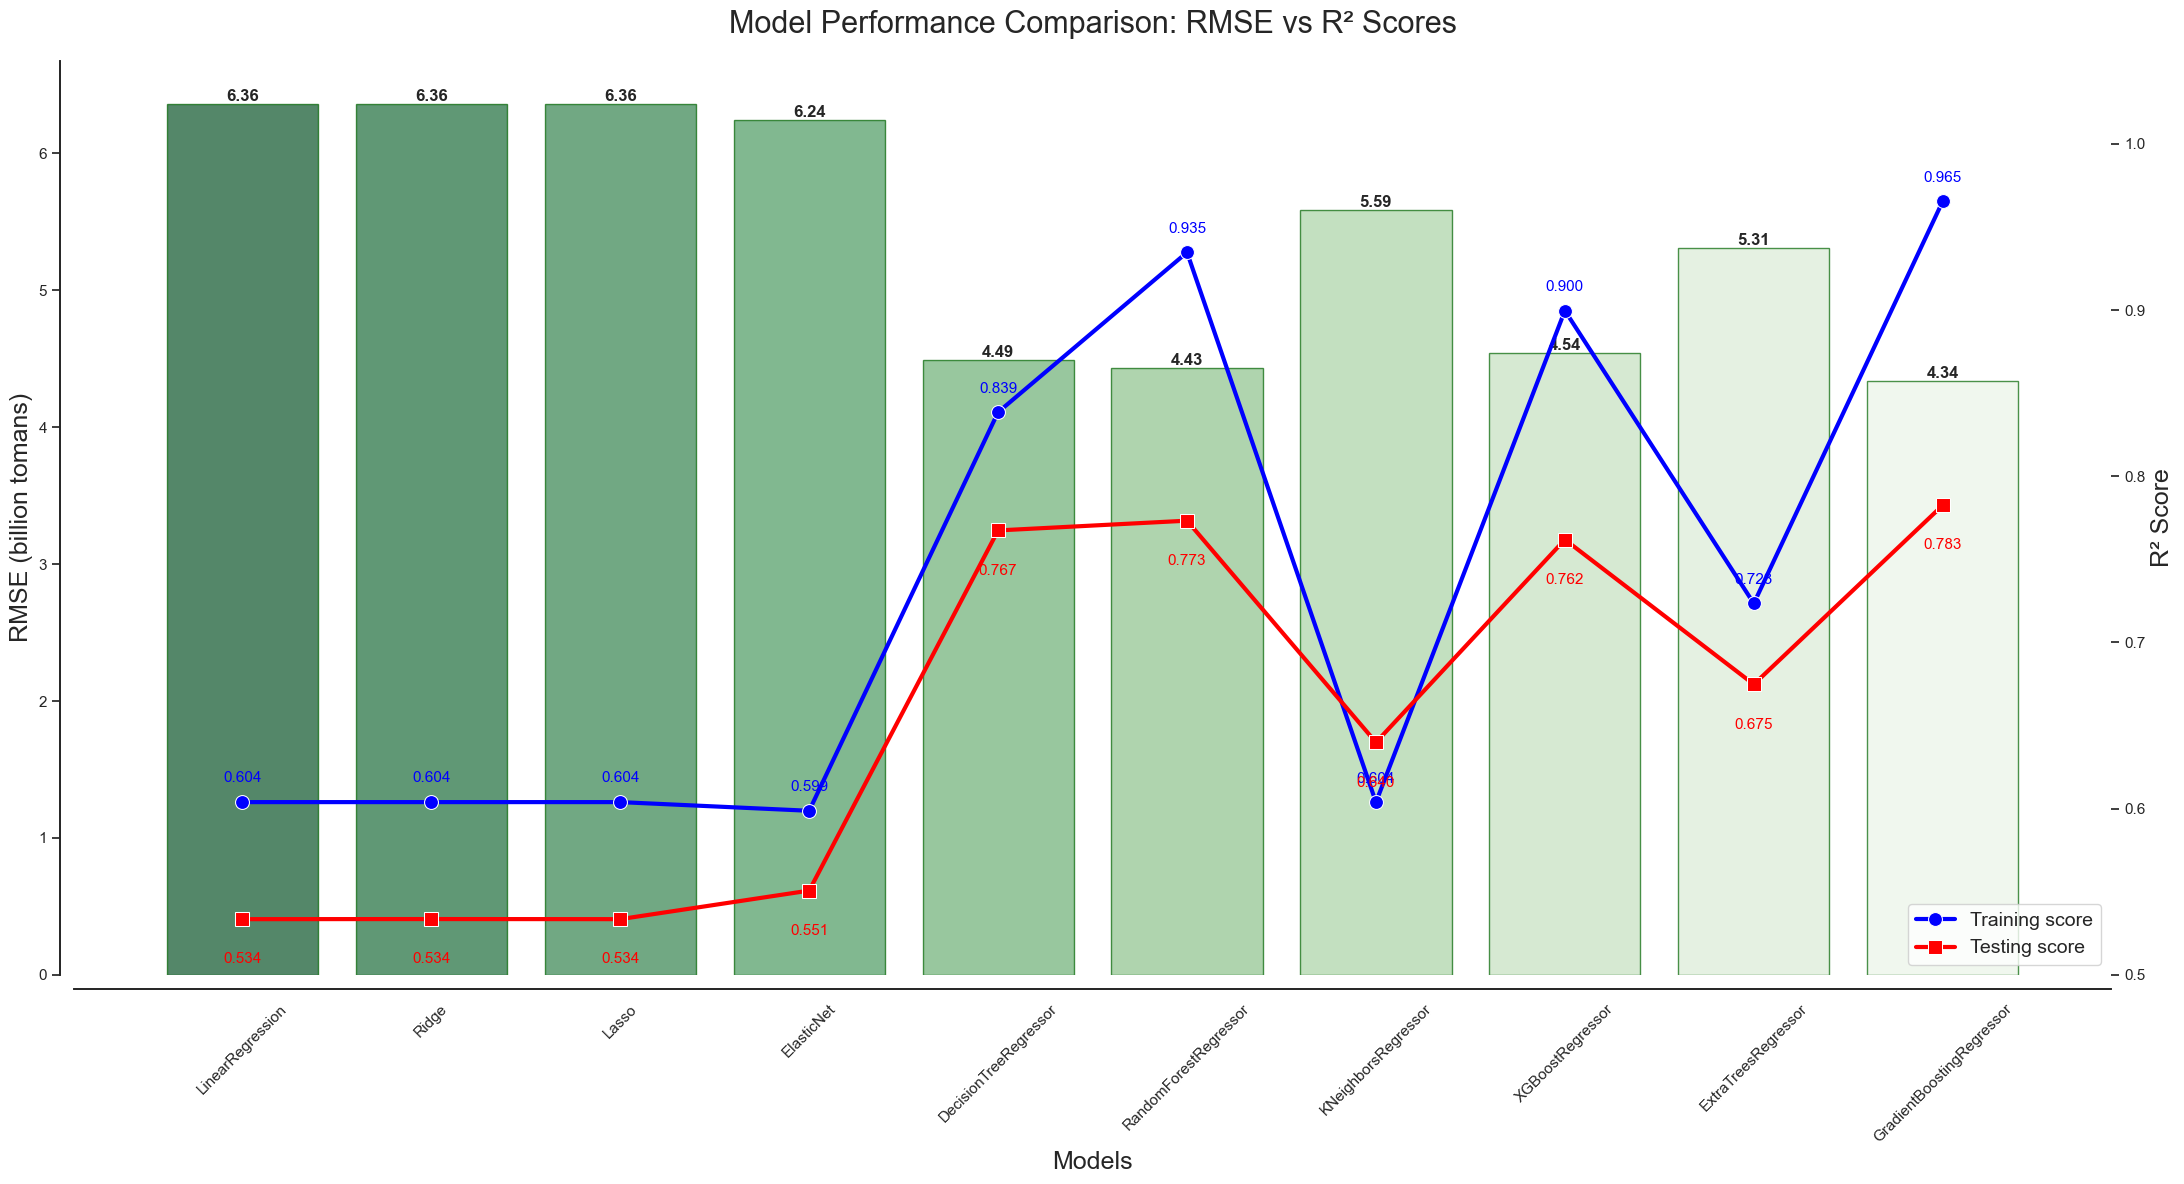

In [149]:
fig, ax = plt.subplots(figsize=(22,12))
sns.set(style='white') 

# Bar plot for RMSE
ax = sns.barplot(x=models_score.index,
                y=models_score['RMSE']/1000000000,
                alpha=0.7,
                palette='Greens_r',
                edgecolor='darkgreen')
ax.set_ylabel("RMSE (billion tomans)", fontsize=18)
ax.set_xlabel("Models", fontsize=18)
ax.tick_params(axis='x', rotation=45)
plt.xticks(rotation=45, ha='right', fontsize=14)  # بهبود خوانایی برچسب‌ها

# Add RMSE values on bars
for i, v in enumerate(models_score['RMSE']/1000000000):
    ax.text(i, v, f"{v:.2f}",
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold')

# Secondary axis for R² scores
sec_ax = ax.twinx()

# Training score (blue)
sec_ax = sns.lineplot(x=models_score.index,
                     y=models_score['Training score'],
                     linewidth=3,
                     color='blue',
                     marker='o',
                     markersize=10,
                     label='Training score')

# Testing score (red)
sec_ax = sns.lineplot(x=models_score.index,
                     y=models_score['Testing score'],
                     linewidth=3,
                     color='red',
                     marker='s',
                     markersize=10,
                     label='Testing score')

# Add R² values on points
for i, (train, test) in enumerate(zip(models_score['Training score'],
                                      models_score['Testing score'])):
    sec_ax.text(i, train+0.01, f"{train:.3f}",
                ha='center',
                va='bottom',
                color='blue',
                fontsize=11)
    sec_ax.text(i, test-0.02, f"{test:.3f}",
                ha='center',
                va='top',
                color='red',
                fontsize=11)

sec_ax.set_ylabel("R² Score", fontsize=18)
sec_ax.set_ylim(0.5, 1.05)  # محدوده معقول برای R²
sec_ax.legend(loc='lower right', fontsize=14)


# عنوان و زیباسازی
plt.title("Model Performance Comparison: RMSE vs R² Scores",
          fontsize=22, pad=20)
sns.despine(offset=10)

plt.tight_layout()
plt.show()

# Save Model

In [150]:
joblib.dump(etr.fit(x_train , y_train), 'finalized.joblib')

['finalized.joblib']

In [4]:
model = joblib.load('finalized.joblib')

In [32]:
address_list = address_dummy.columns.tolist() 

In [54]:
def predict_house_price_in_Tehran(area, room, parking, warehouse, elevator, address):
    parking = 1 if "دارد" in parking else 0
    warehouse = 1 if "دارد" in warehouse else 0
    elevator = 1 if "دارد" in elevator else 0
    input_address = pd.DataFrame(0, index=[0] , columns=address_list)
    if address in address_list:
        input_address[address] = 1
    
    input_data = pd.DataFrame({
        'Area' : [area],
        'Room' : [room],
        'Parking' : [parking],
        'Warehouse' : [warehouse],
        'Elevator' : [elevator]
    })
    
    final_input = pd.concat([input_data, input_address], axis=1)
    prediction = model.predict(final_input)
    
    return prediction[0]


In [55]:
# رابط Gradio
inputs = [
    gr.Number(label="متراژ (متر مربع)"),
    gr.Number(label="تعداد اتاق"),
    gr.Radio(label="پارکینگ", choices=["ندارد", "دارد"], value="ندارد"),
    gr.Radio(label="انباری", choices=["ندارد", "دارد"], value="ندارد"),
    gr.Radio(label="آسانسور", choices=["ندارد", "دارد"], value="ندارد"),
    gr.Dropdown(label="آدرس", choices=address_list)
]

In [36]:
output = gr.Number(label="قیمت پیش‌بینی شده (تومان)")

In [59]:
gr.Interface(fn= predict_house_price_in_Tehran,
            inputs=inputs,
            outputs=output,
            title="1400 پیش‌بینی قیمت خانه در تهران").launch(share=True)

* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://bdfdc9c0aad5a2f19f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [63]:
git clone https://github.com/your-username/Tehran-House-Price-Predictor.git
cd Tehran-House-Price-Predictor

SyntaxError: invalid syntax (3712477637.py, line 1)